### Import dependencies and read data ###

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns #data viz
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.compose import ColumnTransformer 
from sklearn.decomposition import PCA 
from sklearn.cluster import DBSCAN

In [6]:
import plotly.graph_objs as go

In [2]:
pd.set_option('display.max_columns', None)
clean_data = pd.read_csv('mc_FE.csv')
clean_data.head()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Days_Since_Customer,Fam_Size,Num_Accepted,MntTotal
0,2,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,64,3865.086602,1,0,2252
1,2,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,67,3315.086602,3,0,38
2,2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,56,3514.086602,2,0,1202
3,2,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,37,3341.086602,3,0,64
4,4,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,40,3363.086602,3,0,595


In [3]:
#Remove the 'Response' column because it is the target of future predictive model
X, y = clean_data.drop('Response', axis=1).values, clean_data['Response'].values

#Creates a column transformer that sends 'Education' to be encoded and rest scaled
ct = ColumnTransformer([
    ('catagoric', OneHotEncoder(), [0]),
    ('numeric', StandardScaler(), list(range(1, len(X.T))))
])

#Sends the data through the column transformer
X_transformed = ct.fit_transform(X)
print('Preprocessed Data:')
print(X_transformed[0])

Preprocessed Data:
[ 0.          0.          1.          0.          0.          0.23569584
  0.30703926  0.98378127  1.55157698  1.67970233  2.46214705  1.4765001
  0.84320691  0.34941394  1.40930394  2.51089024 -0.55078479  0.69390374
 -0.09728167  0.98534473  1.53118494 -1.75911463 -0.43903713  1.4669731 ]


#### Dimension reduction ###

In [4]:
#Create instance of Principal Component Analysis in order to reduce dimensionality while maintaining variance
#n_components=3 will be chosen in order to visualize the data better
pca = PCA(n_components=3)

#fit to dataset
pca.fit(X_transformed)

#create dimentionality reduced dataset
X_reduced = pca.transform(X_transformed)

print('Dimentionality Reduced Data:')
print(X_reduced[0])

Dimentionality Reduced Data:
[ 4.18713038  0.90750438 -2.06734311]


We have 3 Dimensional data now. Let's check the plot

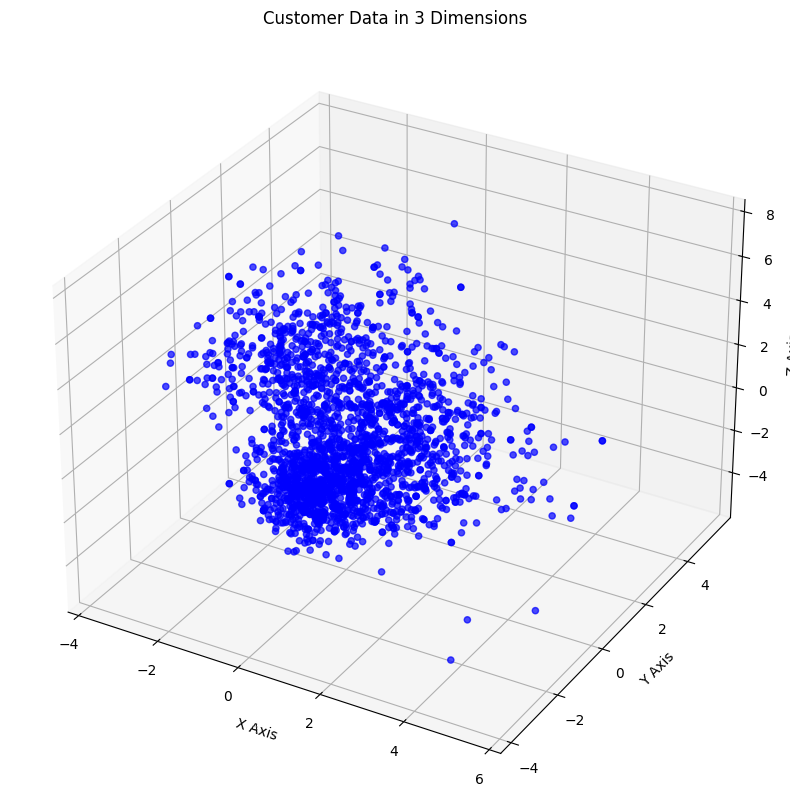

In [14]:

# Define data for 3D scatter plot
scatter_data = go.Scatter3d(
    x=X_reduced.T[1],
    y=X_reduced.T[2],
    z=X_reduced.T[0],
    mode='markers',
    marker=dict(
        size=4,
        color='blue',
        opacity=0.7
    )
)

# Define layout for the plot
layout = go.Layout(
    title='Customer Data in 3 Dimensions',
    scene=dict(
        xaxis=dict(title='X Axis', backgroundcolor='rgb(10, 10, 10)', gridcolor='rgb(200, 200, 200)', showbackground=True, zerolinecolor='rgb(200, 200, 200)'),
        yaxis=dict(title='Y Axis', backgroundcolor='rgb(10, 10, 10)', gridcolor='rgb(200, 200, 200)', showbackground=True, zerolinecolor='rgb(200, 200, 200)'),
        zaxis=dict(title='Z Axis', backgroundcolor='rgb(10, 10, 10)', gridcolor='rgb(200, 200, 200)', showbackground=True, zerolinecolor='rgb(200, 200, 200)')
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    paper_bgcolor='rgb(10, 10, 10)',
    font=dict(color='white')
)

# Create the plot
fig = go.Figure(data=[scatter_data], layout=layout)

# Show the plot
fig.show()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_reduced.T[1], X_reduced.T[2], X_reduced.T[0], c='blue', alpha=0.7)

ax.set_title('Customer Data in 3 Dimensions')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.show()


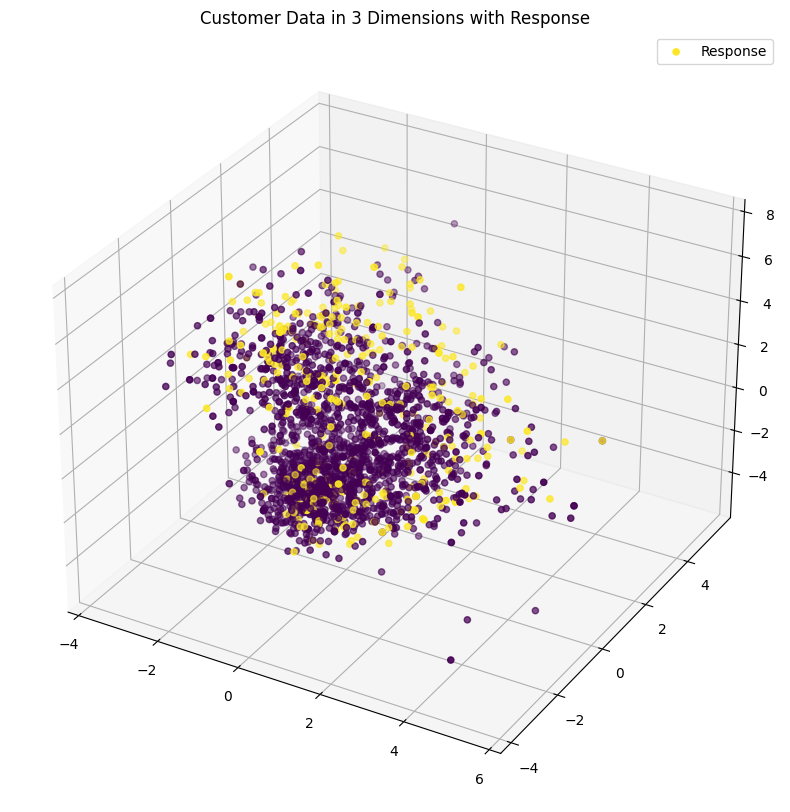

In [21]:
# Define data for 3D scatter plot
scatter_data = go.Scatter3d(
    x=X_reduced.T[1],
    y=X_reduced.T[2],
    z=X_reduced.T[0],
    mode='markers',
    marker=dict(
        size=4,
        color=y,
        colorscale='Viridis',
        opacity=0.7
    )
)

# Define layout for the plot
layout = go.Layout(
    title='Customer Data in 3 Dimensions with Response',
    scene=dict(
        xaxis=dict(title='X Axis'),
        yaxis=dict(title='Y Axis'),
        zaxis=dict(title='Z Axis')
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white')
)

# Create the plot
fig = go.Figure(data=[scatter_data], layout=layout)

# show legend for color
fig.update_layout(showlegend=True)

# Show the plot
fig.show()



#plot the 3d dataset
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_reduced.T[1],X_reduced.T[2],X_reduced.T[0], c=y)
ax.set_title("Customer Data in 3 Dimensions with Response")
ax.legend(['Response'])
plt.show()


It looks like many of the customers who responded were located outside of the dense cluster that holds most customers.

### Clustering customers ###
#### Using DBSCAN ####

In [22]:
#Create an instance of DBSCAN to create non spherical clusters based on data density
db = DBSCAN(eps=0.726, min_samples=26)

#fit to the dimentionality reduced dataset
db.fit(X_reduced)

#identify the clusters
clusters = db.labels_

#display metrics/sample
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print('Cluster Predictions')
print('-------------------------------')
print("Number of clusters: %d" % n_clusters_)
print("Number of noise points: %d" % n_noise_)
print('Number of points per cluster:')
for i in range(n_clusters_):
    print('Cluster', i, ':', len(clusters[clusters==i]))

Cluster Predictions
-------------------------------
Number of clusters: 3
Number of noise points: 770
Number of points per cluster:
Cluster 0 : 1280
Cluster 1 : 157
Cluster 2 : 33


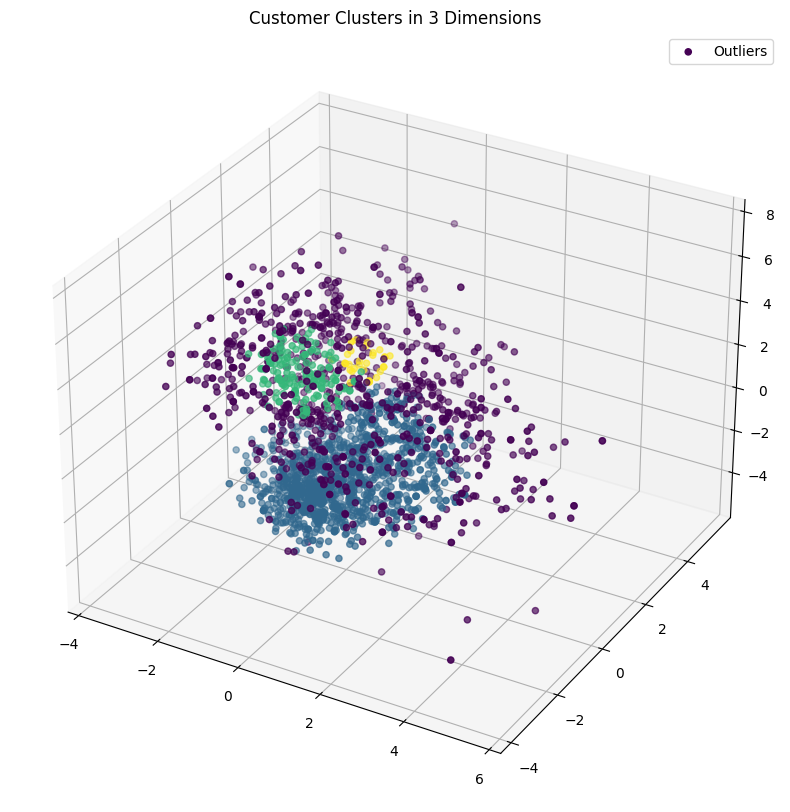

In [28]:
# Define data for 3D scatter plot
scatter_data = go.Scatter3d(
    x=X_reduced.T[1],
    y=X_reduced.T[2],
    z=X_reduced.T[0],
    mode='markers',
    marker=dict(
        size=4,
        color=clusters,
        colorscale='Viridis',
        opacity=0.7
    )   

)

# Define layout for the plot
layout = go.Layout(
    title='Customer Data in 3 Dimensions with Clusters',
    scene=dict(
        xaxis=dict(title='X Axis'),
        yaxis=dict(title='Y Axis'),
        zaxis=dict(title='Z Axis')
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white')
)

# Create the plot
fig = go.Figure(data=[scatter_data], layout=layout)


# Show the plot
fig.show()


#plot the 3d dataset
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_reduced.T[1],X_reduced.T[2],X_reduced.T[0], 
           c=clusters)
ax.set_title("Customer Clusters in 3 Dimensions")
ax.legend(['Outliers'])
plt.show()

About the Clusters:

In [31]:
#append the clusters to the original dataset
clean_data['Cluster'] = clusters

#group by cluster and calculate how many responses there were per cluster
cluster_grp = clean_data.groupby('Cluster').Response.agg(['sum', 'count'])
cluster_grp['percent_resp'] = cluster_grp['sum'].values / cluster_grp['count'].values
cluster_grp

,sum,count,percent_resp
Cluster,,,
-1,174,770,0.225974
0,121,1280,0.094531
1,31,157,0.197452
2,8,33,0.242424


The outlier customers (-1) have a majority of those customers who responded to the campaign (174). On the other hand, customers of the biggest cluster (0) had only 9% response rate

In [32]:
#create new dataframes for each cluster
outlier = clean_data[clean_data.Cluster == -1]
clus0 = clean_data[clean_data.Cluster == 0]
clus1 = clean_data[clean_data.Cluster == 1]
clus2 = clean_data[clean_data.Cluster == 2]

In [37]:
#Create function for plotting distributions per cluster
def create_kdeplot(col, title):
    plt.figure(figsize=(12,8))
    sns.kdeplot(data=outlier, x=col, label='Outliers', alpha=0.6, linewidth=3)
    sns.kdeplot(data=clus0, x=col, label ='Cluster 0', alpha=0.6, linewidth=3)
    sns.kdeplot(data=clus1, x=col, label ='Cluster 1', alpha=0.6, linewidth=3)
    sns.kdeplot(data=clus2, x=col, label ='Cluster 2', alpha=0.6, linewidth=3)
    plt.title(title, fontsize=18, fontweight='bold')
    plt.xlabel(col, fontsize=14)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

#Create function for plotting count of discrete values per cluster
def create_barplot(col, title):
    plt.figure(figsize=(8,8))
    sns.countplot(x=clean_data[col], hue=clean_data["Cluster"], palette="Set2", edgecolor='black')
    plt.title(title, fontsize=18, fontweight='bold')
    plt.xlabel(col, fontsize=14)
    plt.legend(['Outliers', 'Cluster 0', 'Cluster 1', 'Cluster 2'], fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


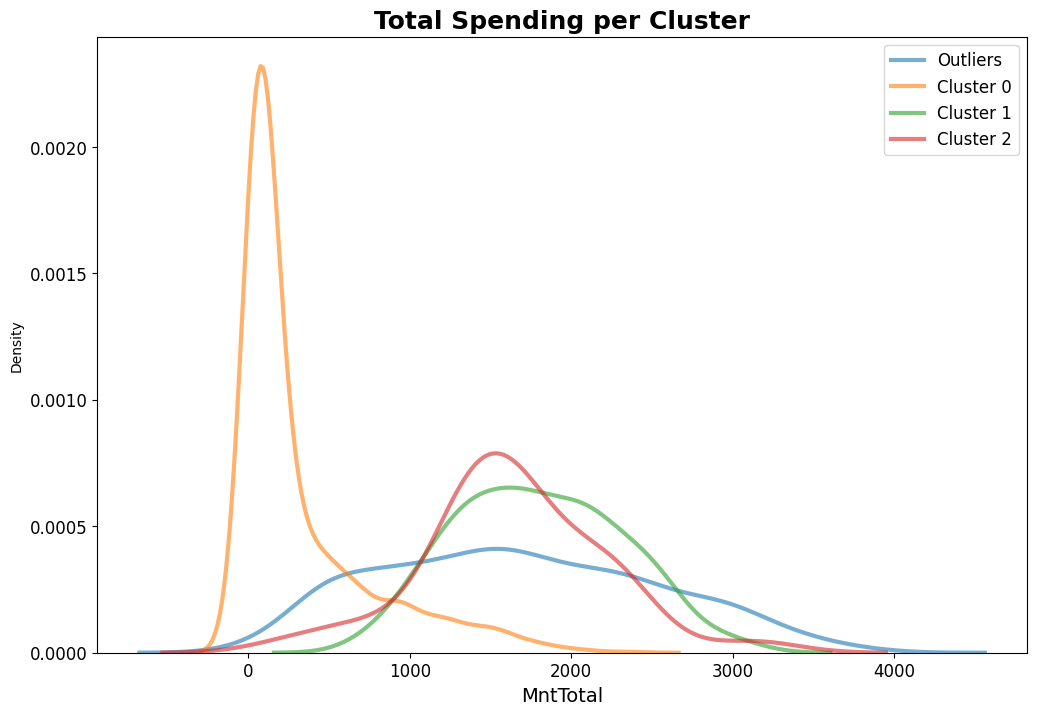

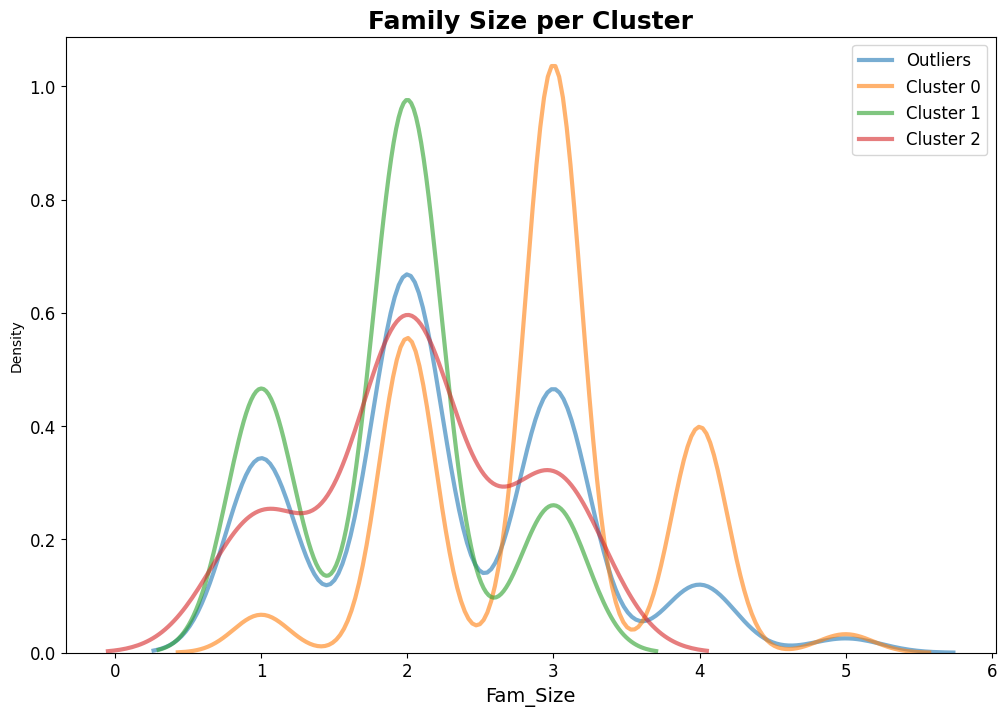

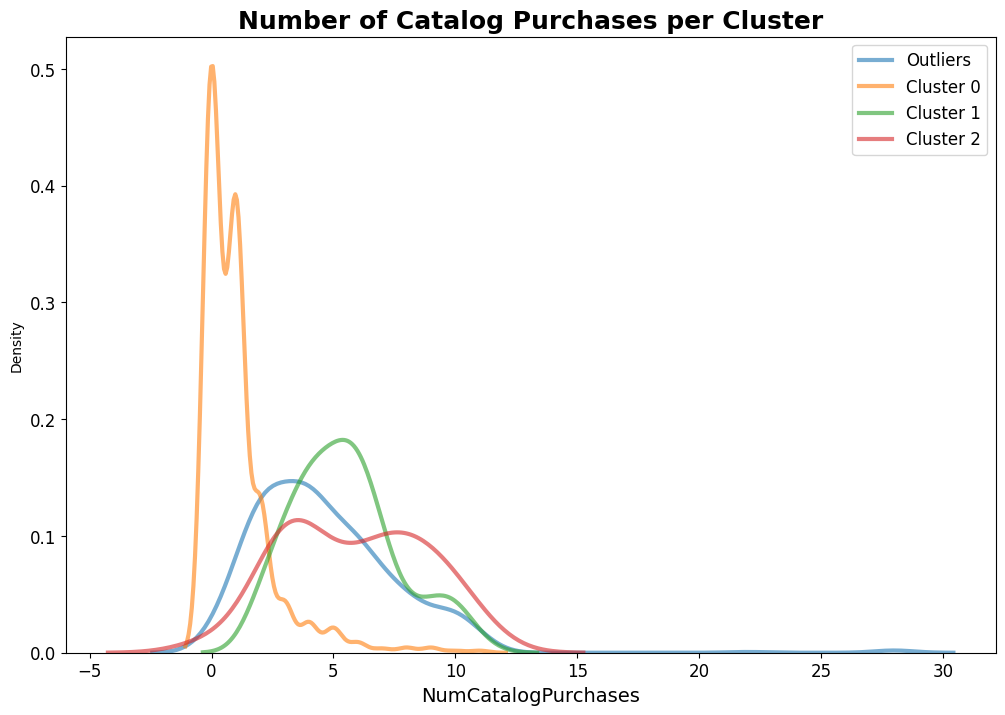

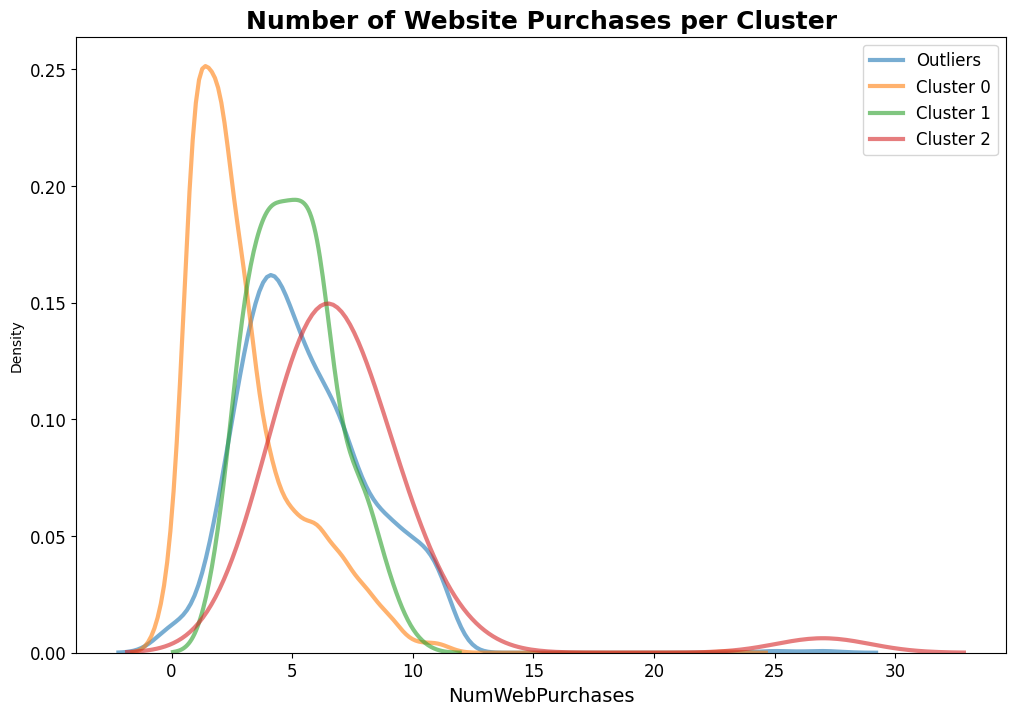

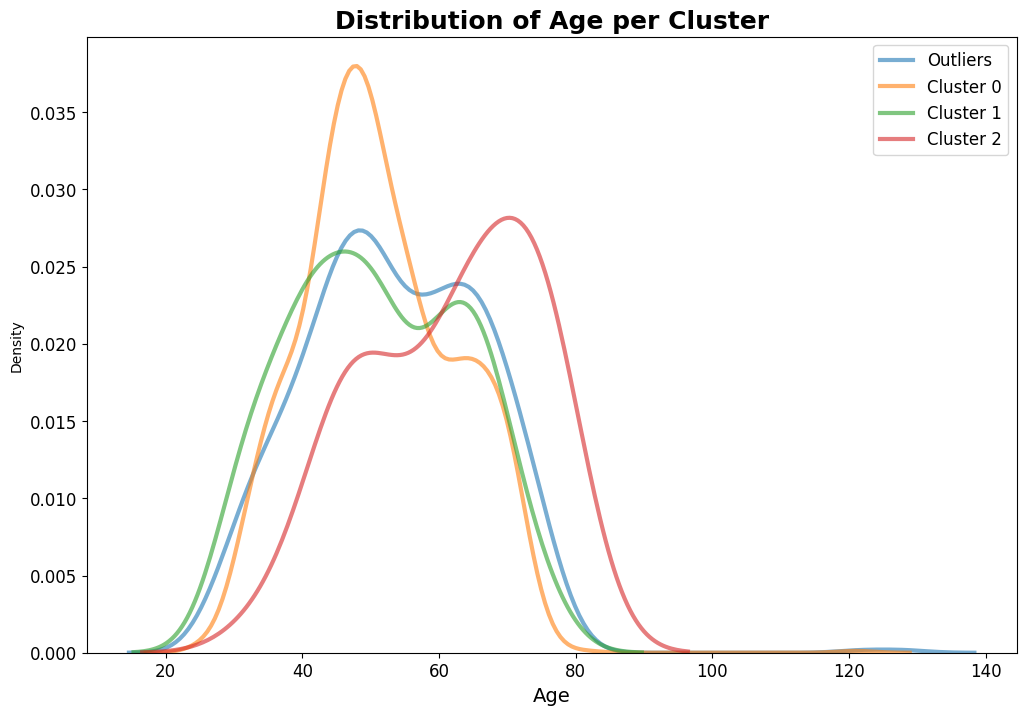

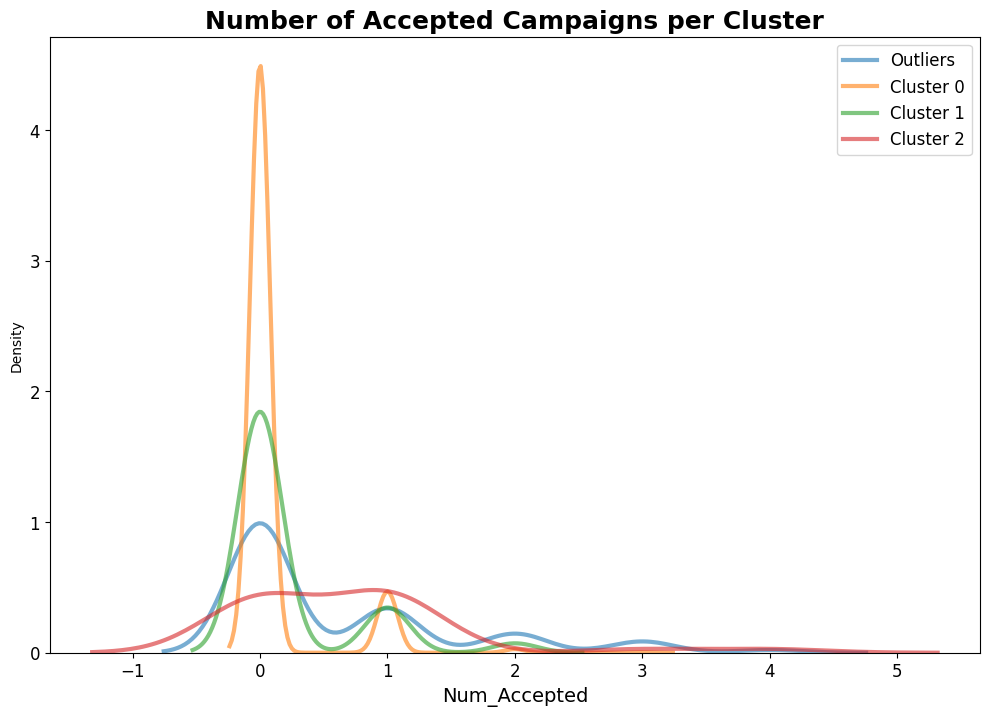

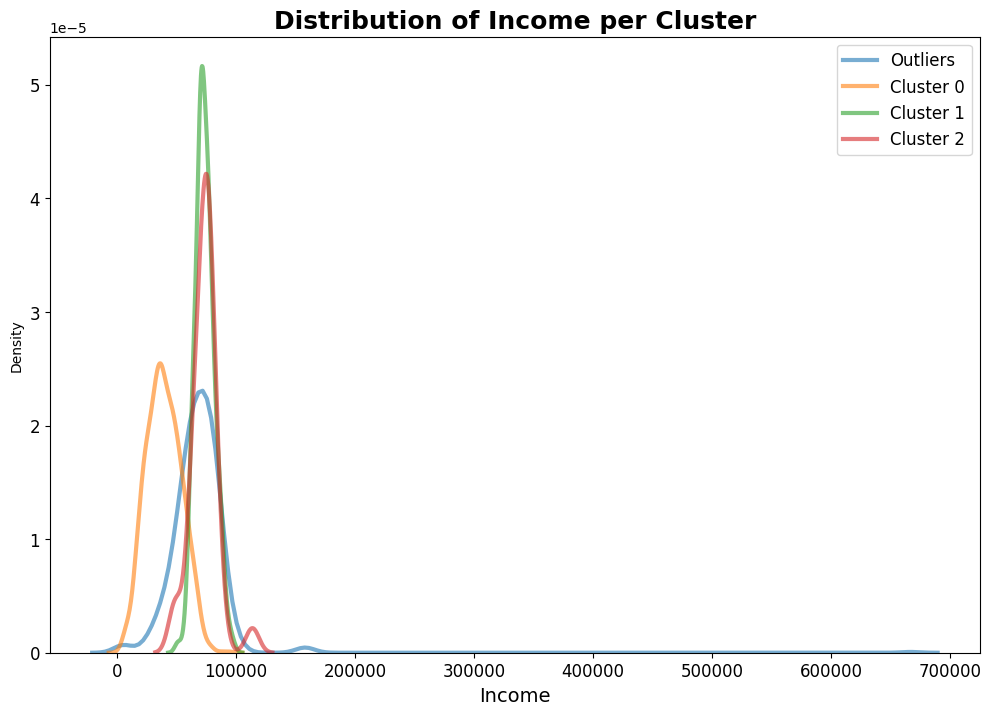

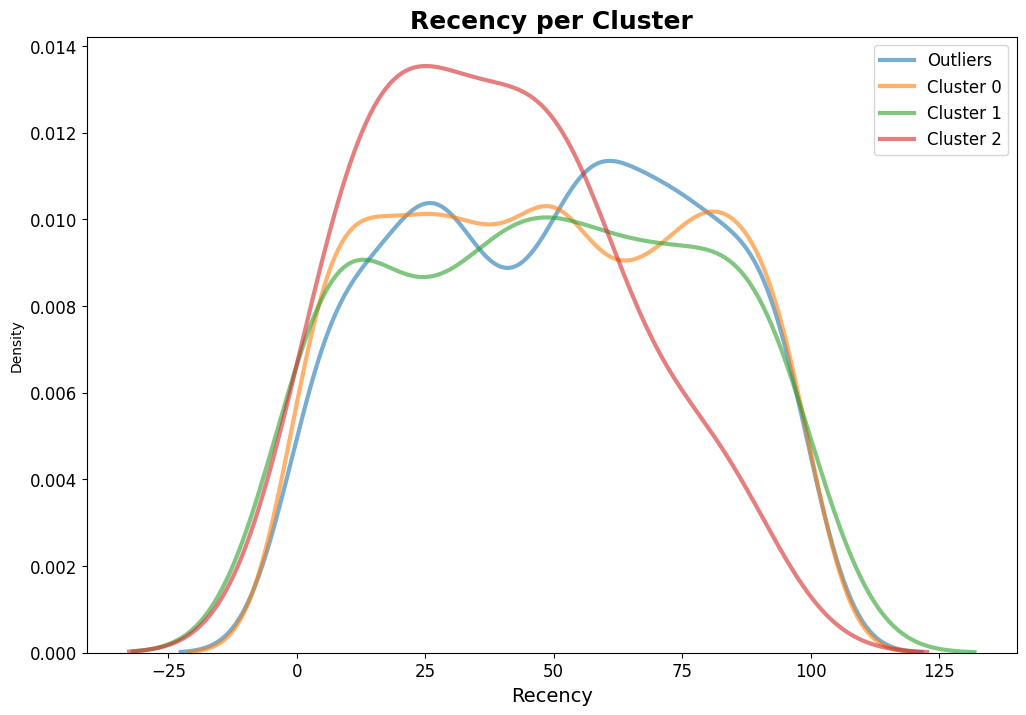

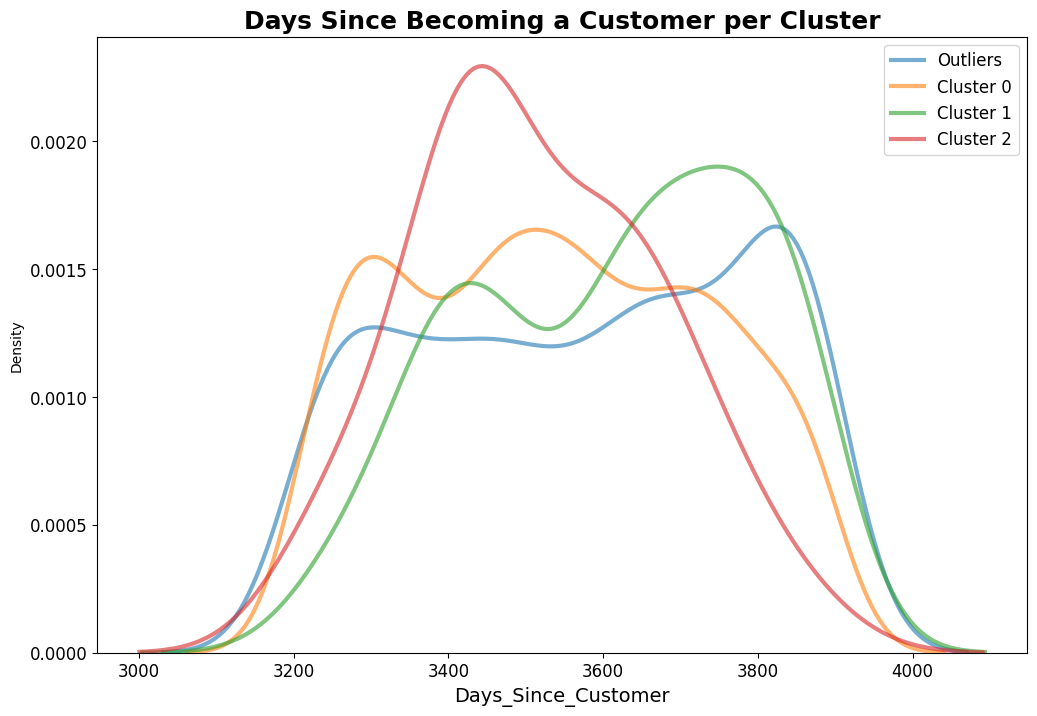

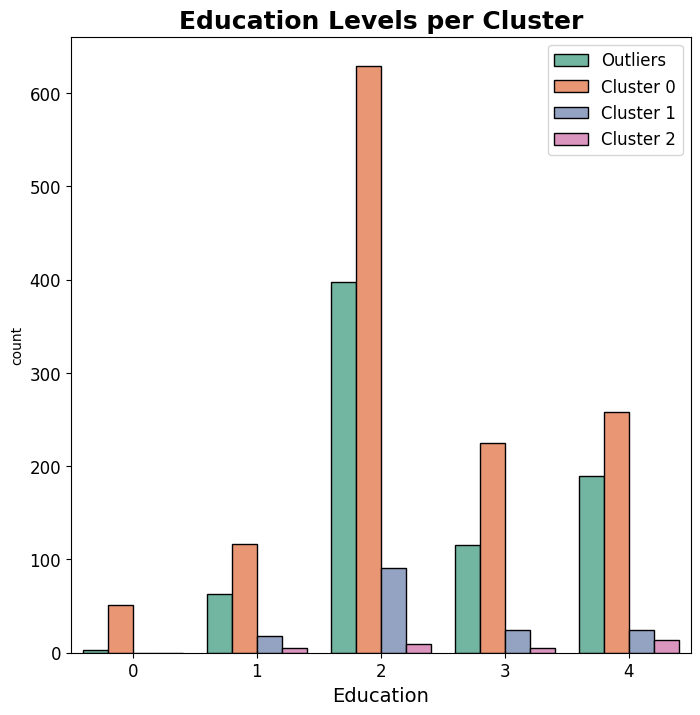

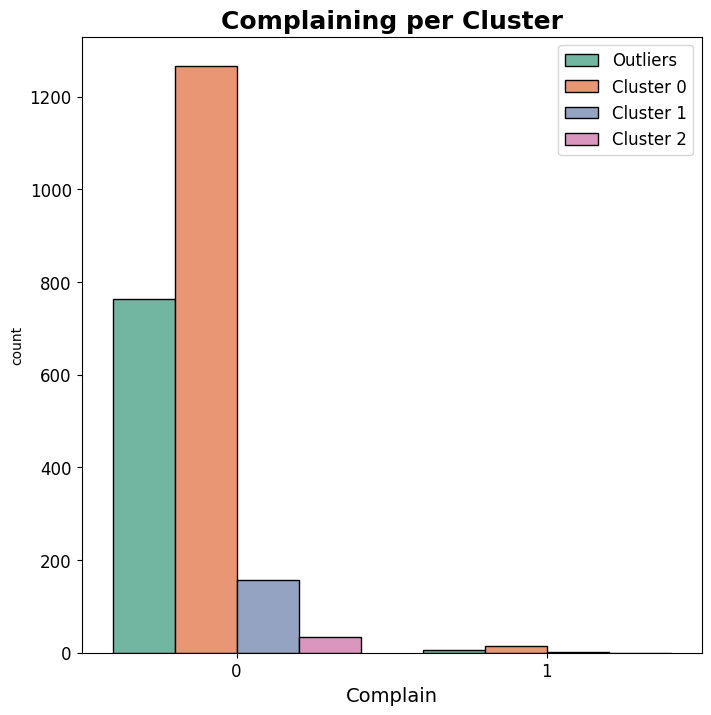

In [38]:
#Create list of variables to plot distributions
vars_to_kdeplot = [('MntTotal', 'Total Spending per Cluster'),
                ('Fam_Size', 'Family Size per Cluster'),
                ('NumCatalogPurchases', 'Number of Catalog Purchases per Cluster'),
                ('NumWebPurchases', 'Number of Website Purchases per Cluster'),
                ('Age', 'Distribution of Age per Cluster'),
                ('Num_Accepted', 'Number of Accepted Campaigns per Cluster'),
                ('Income', 'Distribution of Income per Cluster'),
                  ('Recency', 'Recency per Cluster'),
                  ('Days_Since_Customer', 'Days Since Becoming a Customer per Cluster')]

#Create list of variables to plot in bar graph
vars_to_barplot = [('Education', 'Education Levels per Cluster'),
                  ('Complain', 'Complaining per Cluster')]


#plot all kde plots
for var in vars_to_kdeplot:
    create_kdeplot(var[0], var[1])

#plot all bar plots
for var in vars_to_barplot:
    create_barplot(var[0], var[1])

### Cluster Analysis Insights

We have observed significant differences between the largest cluster (cluster 0) and the other clusters, with more subtle variations among the latter. Here are some notable characteristics for each cluster:

#### Cluster 0: Budget-conscious Families
- Low spending
- Lower income
- Larger family size
- Middle-aged individuals
- Doesn't respond well to marketing

#### Cluster 1: Retirees with Stable Spending
- Moderate spending
- Smaller family size
- Retirement age
- High catalog and web purchases
- Long-time customers
- Moderate response to marketing

#### Cluster 2: High-spending Young Professionals
- High spending
- Smaller family size
- Moderate catalog and web purchases
- Early-middle aged
- Slight response to marketing

#### Outliers: The Engaged Affluents
- Variant spending
- Medium-high income
- Medium-sized family
- Moderate catalog and web purchases
- Middle-aged
- High response to marketing

### Conclusions

The majority of customers are budget-conscious families with low spending habits, larger families, and lower incomes on average. These customers are less likely to respond to marketing campaigns, making it challenging to target them effectively.

On the other hand, customers who deviate from the norm are more likely to respond to marketing efforts. Among these customers, we identified three distinct groups: retirees with stable spending, high-spending young professionals, and the engaged affluents. Overall, these groups both earn and spend more money than the majority of customers, which suggests that marketing targeting these groups may have a higher chance of success. Strategies involving web or catalog promotions could be particularly effective for these customers.
